In [2]:
#common package
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# by using built-in package
from sklearn import svm, datasets 
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
#for 
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_validate
from sklearn import metrics
import statistics as sta
from sklearn.metrics import recall_score
#for randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



#dataset
#df = pd.read_csv(r'G:\MScProject\data\raw_col_norm.csv')
df = pd.read_csv(r'G:\MScProject\data\raw_add_col.csv')

#split data and choose features
# X = df.iloc[:-30,2:]
# y = df.iloc[:-30,1]



In [3]:
#select features
df1 = df.drop(['per_1_d','per_3_d','per_7_d','per_15_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
df1 = df1.dropna()
df1.iloc[:,-1]

30      1
31      0
32      1
33      1
34      0
       ..
1150    0
1151    1
1152    1
1153   -1
1154    0
Name: up_do_1d, Length: 1125, dtype: int64

In [4]:
#split dataset
X = df1.iloc[:-30,2:-2] #exclude the the finaly features related to price
y = df1.iloc[:-30,-1]


 1    0.439269
 0    0.369863
-1    0.190868
Name: up_do_1d, dtype: float64


([<matplotlib.patches.Wedge object at 0x0000019D018B9CD0>, <matplotlib.patches.Wedge object at 0x0000019D018CE400>, <matplotlib.patches.Wedge object at 0x0000019D018CEA90>], [Text(0.20859897405969932, 1.0800400307494353, ''), Text(-0.7817129995330622, -0.7739023106058174, ''), Text(0.9080999464752926, -0.6207692705116539, '')], [Text(0.1137812585780178, 0.5891127440451465, '43.9%'), Text(-0.42638890883621566, -0.4221285330577185, '37.0%'), Text(0.49532724353197766, -0.33860142027908385, '19.1%')])

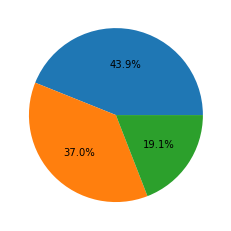

In [5]:
#number of sifferent class
sizes = y.value_counts(sort = 1)
print(sizes/len(y))
plt.pie(sizes, autopct='%1.1f%%')

In [6]:
#data split
from sklearn.model_selection import train_test_split
#shuffle 
#crv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state = 42)
#normal class validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [7]:
#define model
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
model = RandomForestClassifier(n_estimators = 500, random_state = 30)
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=30)

In [8]:
# model and result
prediction_test = model.predict(X_test)
#print(y_test, prediction_test)

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Accuracy =  0.5835866261398176
realized_loss                      0.072096
realized_profit                    0.042010
realized_profits_to_value_ratio    0.040752
loss_sum                           0.037432
profit_relative                    0.036897
transfers_volume_exchanges_net     0.036157
profit_sum                         0.033443
per_30_d                           0.031831
SMA_3                              0.031473
seller_exhaustion_constant         0.030816
count                              0.029234
new_non_zero_count                 0.028862
10-100-address                     0.028475
active_count                       0.028419
active_1y_2y                       0.028414
receiving_count                    0.028240
SMA_7                              0.028164
100-1k-address                     0.028067
active_2y_3y                       0.027504
active_3m_6m                       0.027289
network_capacity_sum               0.026289
exchange_net_position_change       0.025907
s

In [9]:
#paramater tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100,300,500]
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[3,5,10,20]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 5, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 300, 500]}


In [11]:
from time import time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
start = time()
rf_random.fit(X_train, y_train)
end = time()
time_cost = end -start

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [12]:
# best para is  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
best_para = rf_random.best_params_
print('best para is ',best_para)
train_score = rf_random.score(X_train, y_train)
test_score = rf_random.score(X_test, y_test)
print('train accuracy is ', train_score)
print('test accuracy is ', test_score)
# abs(rf_random.predict(X_test)- y_test)/y_test
# rf_random.predict(X_test)

best para is  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
train accuracy is  0.9673629242819843
test accuracy is  0.5775075987841946


In [13]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [14]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
# grid_accuracy = evaluate(best_grid, X_test, y_test)


# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [15]:
best_grid = grid_search.best_estimator_
best_para = grid_search.best_params_
best_accu = best_grid.score(X_test,y_test)
print('best_para is ',best_para)
print('test accuracy is ', best_accu)

best_para is  {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
test accuracy is  0.5623100303951368


In [16]:
# best_para is  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
# test accuracy is  0.5835866261398176

In [20]:
#feature impotantce
feature_list = list(X.columns)
feature_imp = pd.Series(best_grid.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

realized_loss                      0.125438
realized_profits_to_value_ratio    0.072621
realized_profit                    0.069371
loss_sum                           0.066848
profit_relative                    0.064250
active_2y_3y                       0.046395
profit_sum                         0.040900
ssr_oscillator                     0.035207
SMA_3                              0.029287
active_1y_2y                       0.027722
seller_exhaustion_constant         0.025919
10-100-address                     0.024122
transfers_volume_exchanges_net     0.024087
SMA_7                              0.022152
per_30_d                           0.021572
active_6m_12m                      0.021201
100-1k-address                     0.019523
active_3m_6m                       0.019403
count                              0.019010
net_unrealized_profit_loss         0.018941
mvrv_z_score                       0.018381
balance_exchanges_relative         0.018246
active_3y_5y                    

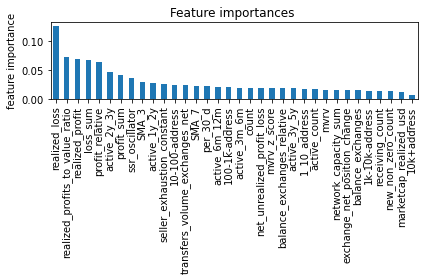

In [25]:
# Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean 
# and standard deviation of accumulation of the impurity decrease within each tree.
feature_imp = pd.Series(best_grid.feature_importances_,index=feature_list).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_imp.plot.bar()
ax.set_title("Feature importances ")
ax.set_ylabel("feature importance")
fig.tight_layout()

In [17]:
pprint(grid_search.get_params())

{'cv': 3,
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': -1,
 'param_grid': {'bootstrap': [True, False],
                'max_depth': [3, 5, 10, 20],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [50, 100, 300, 500]},
 'pre_dispatch': 

NameError: name 'df' is not defined